In [1]:
#!conda install --file requirement.txt
#conda update conda
#conda install slycot control
#para los que tienen pipenvs u otros tipos de enviroments puede usar
#!pip install requirement.txt
#!pip install plotly==4.14.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go



In [2]:
%ls 

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 94BF-37C1

 Directorio de C:\Users\moreno\Documents\repos\DS-ONLINE-57\laboratory

05/03/2021  12:33    <DIR>          .
05/03/2021  12:33    <DIR>          ..
28/02/2021  19:32    <DIR>          .ipynb_checkpoints
28/02/2021  14:00    <DIR>          __pycache__
05/03/2021  12:35           406.332 DS_Bit cora_37_SR_Coseno.ipynb
28/02/2021  19:30            28.571 DS_Bit cora_37_SR_Prepro_y_EDA.ipynb
05/03/2021  12:17                36 prueba.csv
05/03/2021  12:38             6.631 repaso.ipynb
28/02/2021  18:45             7.315 requirement.txt
28/02/2021  18:24         3.667.857 teoria_recomendaciones.ipynb
28/02/2021  14:00             1.274 vector_plot.py
               7 archivos      4.118.016 bytes
               4 dirs  195.267.260.416 bytes libres


In [3]:
path_data = "..\\data\\"
figures = "..\\figures\\"

# Coseno
## Similitud entre pares de puntajes


In [4]:
coseno = pd.read_csv(path_data+"coseno.csv", delimiter=";")

In [5]:
coseno

,nombre,indiana_jones,harry_potter
0,alumno1,4,5
1,alumno2,2,1
2,alumno3,3,1


### Hipótesis

Alumno2 es parecido al Alumno 3. A ambos no les gusta Harry Potter, tampcoo son fanaticos de indiana jones pero algo nos dice sobre sus gustos

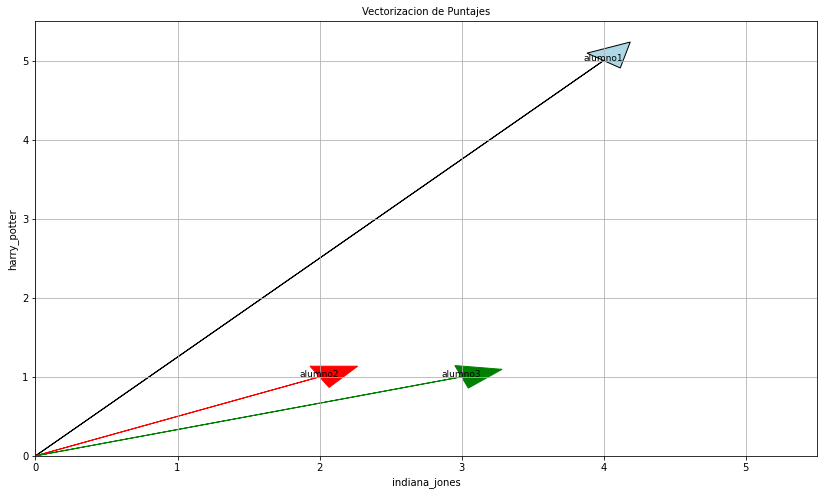

In [11]:
#matplot a veces no es tan flexible sobre todo para graficar vectores. Ingrese los puntajes directamente en cada uno de los ax.arrow.
plt.rcParams["figure.figsize"] = (14,8)
ax = plt.axes()
ax.arrow(0, 0, 4,5, head_width=0.3, head_length=0.3, fc='lightblue', ec='black')
ax.arrow(0, 0, 2,1, head_width=0.3, head_length=0.3, fc='red', ec='red')
ax.arrow(0, 0, 3,1, head_width=0.3, head_length=0.3, fc='green', ec='green')


ax.text(4,5, "alumno1", ha="center", size=9)
ax.text(2,1, "alumno2", ha="center",  size=9)
ax.text(3,1, "alumno3", ha="center", size=9)

plt.xlabel ('indiana_jones')
plt.ylabel ('harry_potter')
plt.grid()

plt.xlim(0,5.5)
plt.ylim(0,5.5)

plt.title('Vectorizacion de Puntajes',fontsize=10)

plt.show()


### ¿Cuales son más parecidos?

Intuitivamente: los que estan mas cerca.

científicamente: similaridad coseno. Producto Vectorial dividido la norma. 

Values range between -1 and 1, where -1 is perfectly dissimilar and 1 is perfectly similar.



![coseno](../figures/coseno.png)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
coseno = coseno.set_index('nombre')



In [13]:
vectores = cosine_similarity(coseno.values)

df = pd.DataFrame(vectores, columns=coseno.index.values, index=coseno.index).reset_index()
df


,nombre,alumno1,alumno2,alumno3
0,alumno1,1.000000,0.907959,0.839570
1,alumno2,0.907959,1.000000,0.989949
2,alumno3,0.839570,0.989949,1.000000


<AxesSubplot:ylabel='nombre'>

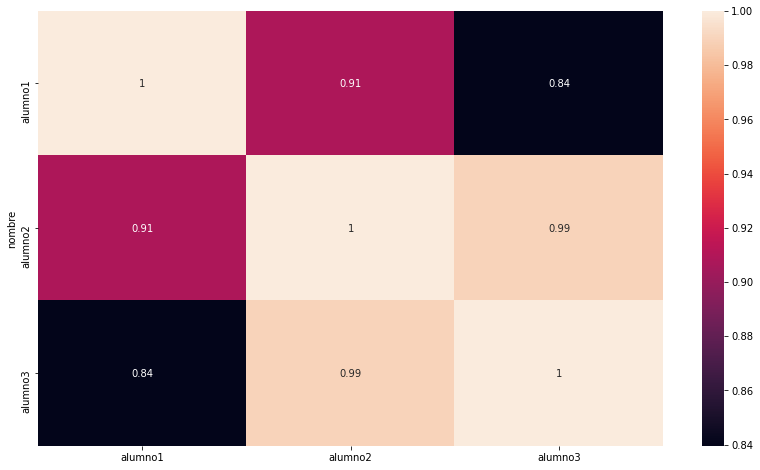

In [14]:
import seaborn as sns
sns.heatmap(df.set_index('nombre'), annot=True)


# Jaccard Distance

![title](../figures/ven_diagram.png)


### Hay items que son más parecidos dentro de un conjunto de items.

Jaccard calcula el cociente entre la cantidad de elementos en la intersección (los elementos en común), y todos los elementos (la unión de los conjuntos, sin repetir ítems).

Va entre 0 y 1. 

Ejemplo: Frutas

¿Que fruta me recomendas? ¿Las que sean similares entre sí?

In [11]:
jaccard = pd.read_csv(path_data+"frutas.csv", delimiter=";")
jaccard

,fruta,redondo,dulce,acido,crunchi
0,manzana,1,1,1,1
1,banana,0,1,0,0


In [12]:
jaccard.set_index('fruta')


,redondo,dulce,acido,crunchi
fruta,,,,
manzana,1,1,1,1
banana,0,1,0,0


In [13]:
print(f' El coeficiente de jaccard entre banana y manzana, se cuenta de la siguiente manera hay 4 atributos, \n redondo, dulce, acido y crunchi.\n Banana y manzana comparten sólo 1 atributo. Por lo tanto el coeficiente de jaccard \n simplemente es 1 de 4 es decir: {1/4}' )

 El coeficiente de jaccard entre banana y manzana, se cuenta de la siguiente manera hay 4 atributos, 
 redondo, dulce, acido y crunchi.
 Banana y manzana comparten sólo 1 atributo. Por lo tanto el coeficiente de jaccard 
 simplemente es 1 de 4 es decir: 0.25


# Coseno recargado 
## +
### Repasito

In [15]:
coseno_reload = pd.read_csv(path_data+"puntajes.csv", delimiter=";")

### nombre de columnas

¿Cómo averiguo nombre de columnas?

In [16]:
coseno_reload.columns

Index(['nombre', 'diario_de_una_pasion', 'indiana_jones', 'harry_potter'], dtype='object')

Cantidad de filas y columnas

In [17]:
coseno_reload.shape

(3, 4)

In [65]:
#columnas,describe, len, etc
coseno_reload.head()

,nombre,diario_de_una_pasion,indiana_jones,harry_potter
0,alumno1,1,5,3
2,alumno3,2,4,1


### ¿Como se filtra?

Una columna

In [20]:
coseno_reload["nombre"]

0    alumno1
1    alumno2
2    alumno3
Name: nombre, dtype: object

### ¿Cómo se filtra un ejemplo?









Podría ser un nombre o podría ser una condición

In [21]:
filtro = coseno_reload["nombre"] == "alumno1"

In [22]:
coseno_reload[filtro]

,nombre,diario_de_una_pasion,indiana_jones,harry_potter
0,alumno1,1,5,3


### Método mask - Isin Bitacora 37

In [29]:
lista_filtro = ["alumno1"]

In [31]:
coseno_reload[coseno_reload['nombre'].isin(lista_filtro)]



,nombre,diario_de_una_pasion,indiana_jones,harry_potter
0,alumno1,1,5,3


In [43]:
coseno_reload

,nombre,diario_de_una_pasion,indiana_jones,harry_potter
0,alumno1,1,5,3
1,alumno2,5,1,5
2,alumno3,2,4,1


In [50]:
filtrado = np.logical_or(coseno_reload.diario_de_una_pasion > 2,coseno_reload.harry_potter > 3)

In [55]:
indice = filtrado[filtrado].index

In [61]:
coseno_reload = coseno_reload[~filtrado]

In [62]:
coseno_reload

,nombre,diario_de_una_pasion,indiana_jones,harry_potter
0,alumno1,1,5,3
2,alumno3,2,4,1


### ¿Y si quiero excluir la columna alumno?

In [22]:
 coseno_reload.columns

Index(['nombre', 'diario_de_una_pasion', 'indiana_jones', 'harry_potter'], dtype='object')

In [23]:
list(coseno_reload.columns)

['nombre', 'diario_de_una_pasion', 'indiana_jones', 'harry_potter']

In [24]:
columnas = list(coseno_reload.columns)

### 1. Opcion loopeada vs list comprehension

In [26]:
for i in columnas:
    print(i)

nombre
diario_de_una_pasion
indiana_jones
harry_potter


In [27]:
for i in columnas:
    if i not in columns_para_excluir:
        print(i)

diario_de_una_pasion
indiana_jones
harry_potter


In [28]:
filtro = [i for i in columnas if i not in columns_para_excluir]

In [29]:
coseno_reload[filtro]

,diario_de_una_pasion,indiana_jones,harry_potter
0,1,5,3
1,5,1,5
2,2,4,1


### 2. Opcion pandas loc


In [30]:
coseno_reload.loc[:, coseno_reload.columns != 'nombre']


,diario_de_una_pasion,indiana_jones,harry_potter
0,1,5,3
1,5,1,5
2,2,4,1


In [32]:
df_filtrado = coseno_reload[filtro]

In [33]:
 df_filtrado.iloc[0].to_numpy()

array([1, 5, 3], dtype=int64)

In [34]:
p0 = df_filtrado.iloc[0].to_numpy()
p1 = df_filtrado.iloc[1].to_numpy()
p2 = df_filtrado.iloc[2].to_numpy()

In [35]:
from vector_plot import vector_plot


In [63]:
vector_plot([p0,p1,p2])

NameError: name 'vector_plot' is not defined

In [37]:
print("El alumno 1 parece tener más relación con el alumno 3 por la dirección del vector")

El alumno 1 parece tener más relación con el alumno 3 por la dirección del vector


In [38]:
df_filtrado

,diario_de_una_pasion,indiana_jones,harry_potter
0,1,5,3
1,5,1,5
2,2,4,1


In [39]:
vectores = cosine_similarity(df_filtrado.values)
vectores

array([[1.        , 0.59172634, 0.92213889],
       [0.59172634, 1.        , 0.58057571],
       [0.92213889, 0.58057571, 1.        ]])

In [40]:
df = pd.DataFrame(vectores, columns=coseno_reload.nombre, index=coseno_reload.nombre).reset_index()
df


nombre,nombre,alumno1,alumno2,alumno3
0,alumno1,1.000000,0.591726,0.922139
1,alumno2,0.591726,1.000000,0.580576
2,alumno3,0.922139,0.580576,1.000000


<AxesSubplot:xlabel='nombre', ylabel='nombre'>

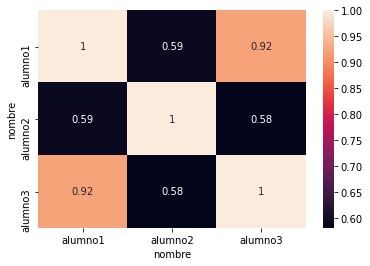

In [41]:
sns.heatmap(df.set_index('nombre'), annot=True)